# **Stock Market Analysis** 

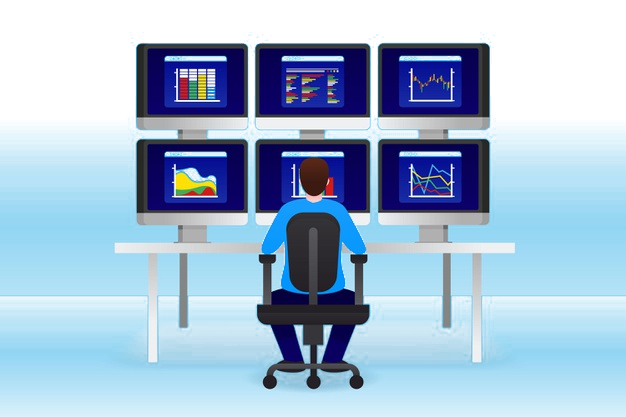

### Business Scenario:

Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. 
However, we will analyse data from the stock market for some technology stocks such as **Apple**, **Google**,  **Amazon** and **Microsoft**



### Objective:

Use Python libraries such as Pandas, Seaborn and Matplotlib to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history

### About the Data:

The stocks I have chosen are from various industries and market caps namely,


*   Apple
*   Google
*   Microsoft
*   Amazon

For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis. 

To know more about stocks and their data please visit the below link: https://in.finance.yahoo.com/ 





Here is some of the Questions we shall try to answer

*   Read the Data from Yahoo finance website directly
*   Perform cleaning 
*   What was the change in stock price over time? 
*   Visualize the change in a stock’s volume being traded, over time?
*   What was the moving average of various stocks?
*   What was the daily return average of a stock?
*   Add a new column ‘Trend’ whose values are based on the 'Daily Return'
*   Visualize the trend frequency through a Pie Chart
*   What was the correlation between daily returns of different stocks?










### Import the required Libraries

In [1]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

#Visualisation imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
!pip install pandas-datareader
import pandas_datareader.data as web
from datetime import datetime



Creating a list with the stock names, for future looping

In [2]:
#We're going to analyse stock info for Apple, Google, Microsoft and Amazon.
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
#Setting the end date to today
end = datetime.now()

In [4]:
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

#### **Reading the Data from Yahoo finance website directly**

In [5]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

Thanks to the globals method, **Amazon**’s stock data will be stored in the AMZN global variable dataframe. Let’s see if it works

In [6]:
AMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-18,172.458496,169.255005,169.417999,172.337006,63482000.0,172.337006
2021-10-19,172.734497,171.100006,171.714493,172.207504,47722000.0,172.207504
2021-10-20,173.143005,170.018494,172.632996,170.753006,42796000.0,170.753006
2021-10-21,172.014008,170.149994,170.712494,171.750504,37628000.0,171.750504
2021-10-22,171.492004,166.565002,171.050003,166.777496,62782000.0,166.777496
...,...,...,...,...,...,...
2022-10-12,113.830002,111.400002,112.489998,112.900002,45728700.0,112.900002
2022-10-13,113.440002,105.349998,107.879997,112.529999,86868100.0,112.529999
2022-10-14,114.959999,106.599998,114.099998,106.900002,67651200.0,106.900002


In [7]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-18,142.998749,141.213501,141.213501,142.960495,16564000.0,142.960495
2021-10-19,144.106995,143.095993,143.291504,143.822006,15316000.0,143.822006
2021-10-20,144.247757,141.912003,144.222504,142.414993,17940000.0,142.414993
2021-10-21,142.849503,141.636993,142.192001,142.780502,14850000.0,142.780502
2021-10-22,141.558502,137.170502,140.350998,138.625000,30182000.0,138.625000
...,...,...,...,...,...,...
2022-10-12,99.648003,97.669998,98.269997,98.300003,17343400.0,98.300003
2022-10-13,100.529999,95.269997,95.930000,99.709999,32812200.0,99.709999
2022-10-14,101.290001,97.029999,100.625000,97.180000,22612900.0,97.180000


### Inference:

Now, we have successfully grabbed the data from Yahoo Finance!!

In [8]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,144.533374,139.896109,142.286597,142.135888,7.190884e+07,142.135888
std,23.468910,23.642129,23.619020,23.498800,3.128653e+07,23.498800
min,104.580002,101.260002,102.750000,102.309998,3.575400e+07,102.309998
25%,121.994499,117.690002,119.889999,120.300003,5.339000e+07,120.300003
50%,144.945007,140.300003,142.850006,142.690002,6.352000e+07,142.690002
75%,166.369995,162.686996,164.149506,164.356995,8.054800e+07,164.356995
max,188.107498,183.785995,185.634506,184.802994,2.726620e+08,184.802994


Amazon's Stock’s minimum, maximum, and average price was 

#### **Cleaning the Data**

Adding a new column named **Company** in each Dataframe

In [9]:
AAPL['Company'] = 'Apple'
GOOG['Company'] = 'Google'
AMZN['Company'] = 'Amazon'
MSFT['Company'] = 'Microsoft'

Merging all the Dataframe together to create a single Dataframe

In [10]:
stocks=pd.concat([AAPL,AMZN,GOOG,MSFT])

In [11]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2021-10-18,146.839996,143.160004,143.449997,146.550003,85589200.0,145.733368,Apple
2021-10-19,149.169998,146.550003,147.009995,148.759995,76378900.0,147.931061,Apple
2021-10-20,149.750000,148.119995,148.699997,149.259995,58418800.0,148.428268,Apple
2021-10-21,149.639999,147.869995,148.809998,149.479996,61421000.0,148.647034,Apple
2021-10-22,150.179993,148.639999,149.690002,148.690002,58883400.0,147.861450,Apple


Store the data in a CSV file (if required)

In [22]:
#stocks.to_csv('Stocks.csv',index=False)

Checking the basic information of the data

In [12]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2021-10-18 to 2022-10-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1012 non-null   float64
 1   Low        1012 non-null   float64
 2   Open       1012 non-null   float64
 3   Close      1012 non-null   float64
 4   Volume     1012 non-null   float64
 5   Adj Close  1012 non-null   float64
 6   Company    1012 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.2+ KB


Checking for null values

In [13]:
stocks.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

### Inference:

No missing info in the dataframe 

Checking for duplicates

In [14]:
stocks.duplicated().sum()

0

### Inference:

No duplicate record in the dataframe 

#### **What was the change in a stock’s price over time?**

In [15]:
Companies = stocks['Company'].drop_duplicates().values
print(Companies)

['Apple' 'Amazon' 'Google' 'Microsoft']


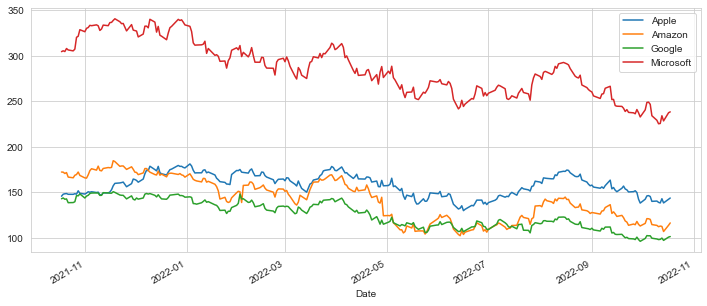

In [17]:
grouped = stocks.groupby('Company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)

ax.legend(Companies)
plt.show()

Let us look at the price trend of individual stocks

<AxesSubplot:title={'center':"Amazon's Stock Trend"}, xlabel='Date'>

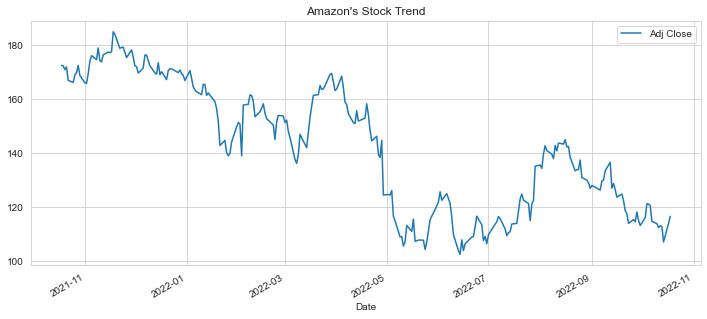

In [18]:
AMZN['Adj Close'].plot(legend=True,figsize=(12,5),title = "Amazon's Stock Trend")

<AxesSubplot:title={'center':"Microsoft's Stock Trend"}, xlabel='Date'>

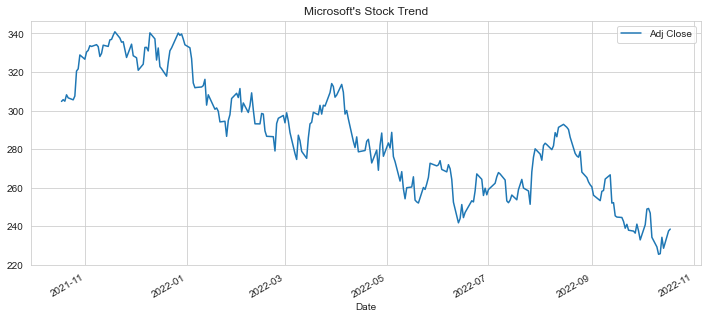

In [19]:
#Plotting the stock's adjusted closing price using pandas
MSFT['Adj Close'].plot(legend=True,figsize=(12,5),title = "Microsoft's Stock Trend")

### Inference:

MSFT stock notched a record high of 349.67 on Nov. 22. But it tumbled during the recent stock market correction. It ended the regular session May 6 at 274.73.

#### Visualize the change in a stock’s volume being traded, over time

<AxesSubplot:xlabel='Date'>

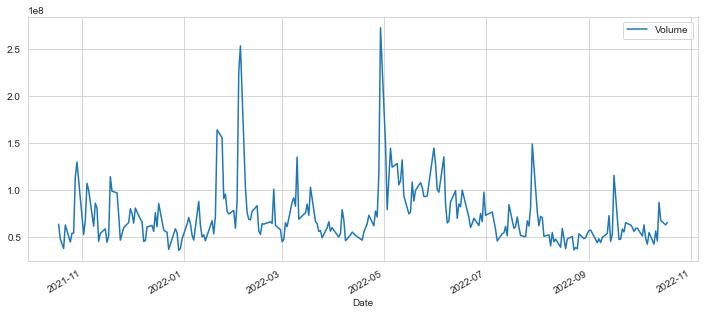

In [20]:
#Plotting the total volume being traded over time
AMZN['Volume'].plot(legend=True,figsize=(12,5))

### Inference:

As we can observe, there was a spike in the volume in the Feb 2022 and then again in th month of May.

#### **What was the moving average of various stocks?**

In [21]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma,center=False).mean()

In [22]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2022-10-12,113.830002,111.400002,112.489998,112.900002,45728700.0,112.900002,Amazon,117.6610,128.2122,121.634915
2022-10-13,113.440002,105.349998,107.879997,112.529999,86868100.0,112.529999,Amazon,116.9735,127.6724,121.684305
2022-10-14,114.959999,106.599998,114.099998,106.900002,67651200.0,106.900002,Amazon,116.1420,126.9590,121.677735
2022-10-17,114.190002,110.089996,110.110001,113.790001,62782000.0,113.790001,Amazon,115.5985,126.4188,121.774635
2022-10-18,119.519997,114.790001,119.059998,116.360001,65426500.0,116.360001,Amazon,115.3070,125.9578,121.870485


<AxesSubplot:xlabel='Date'>

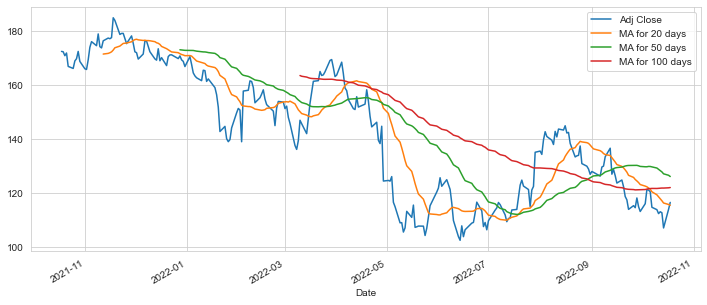

In [23]:
AMZN[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

### Inference:

Moving averages for more days have a smoother plot, as they’re less reliable on daily fluctuations. Still we can see that Amazon’s stock wahas been seeing a slight dip this year. 

#### **What was the daily return average of a stock?**

In [24]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

In [25]:
AMZN['Daily Return'].tail()

Date
2022-10-12    0.006149
2022-10-13   -0.003277
2022-10-14   -0.050031
2022-10-17    0.064453
2022-10-18    0.022585
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

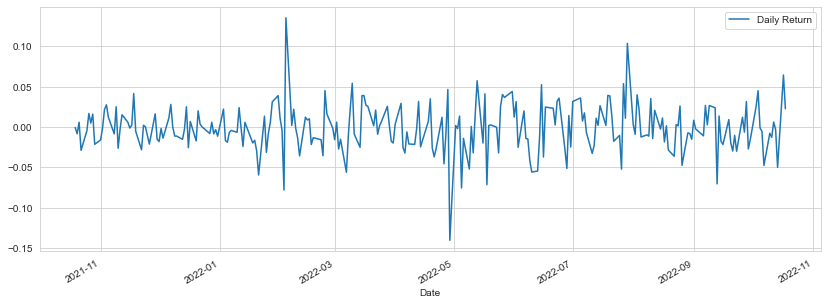

In [26]:
#Plotting the daily return
AMZN['Daily Return'].plot(figsize=(14,5),legend=True)

C:\Users\swapnil.jadhav03\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return'>

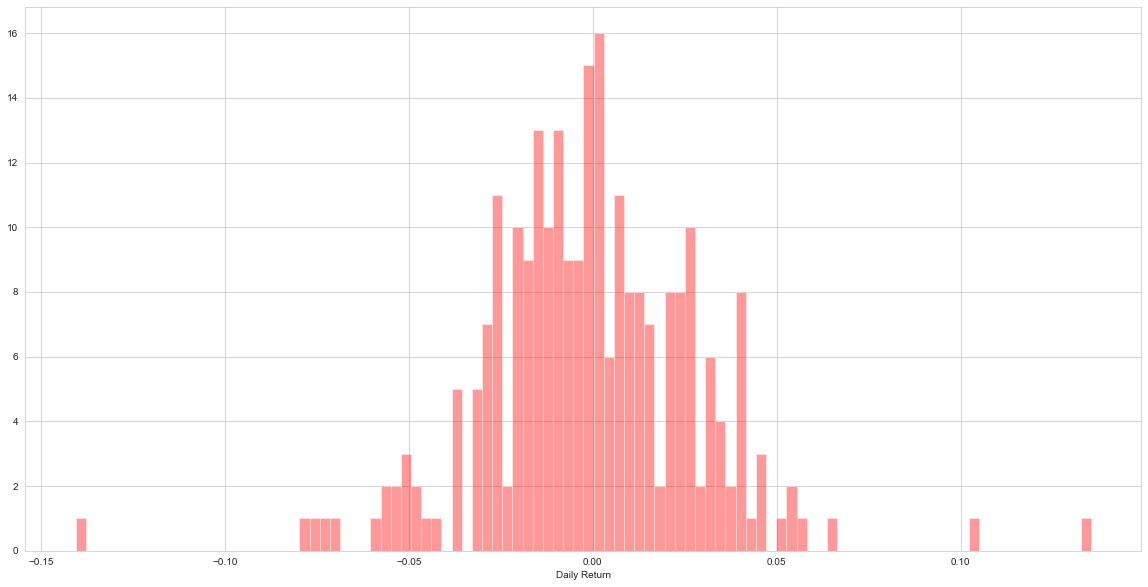

In [27]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

### Inference:

Positive daily returns are almost as frequent as negative returns for Amazon currently.

#### **Add a new column ‘Trend’ whose values are based on the 'Daily Return'**


In [28]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))
AMZN.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-10-12,113.830002,111.400002,112.489998,112.900002,45728700.0,112.900002,Amazon,117.6610,128.2122,121.634915,0.006149,Slight or No change
2022-10-13,113.440002,105.349998,107.879997,112.529999,86868100.0,112.529999,Amazon,116.9735,127.6724,121.684305,-0.003277,Slight or No change
2022-10-14,114.959999,106.599998,114.099998,106.900002,67651200.0,106.900002,Amazon,116.1420,126.9590,121.677735,-0.050031,Slight Negative
2022-10-17,114.190002,110.089996,110.110001,113.790001,62782000.0,113.790001,Amazon,115.5985,126.4188,121.774635,0.064453,Among top gainers
2022-10-18,119.519997,114.790001,119.059998,116.360001,65426500.0,116.360001,Amazon,115.3070,125.9578,121.870485,0.022585,Slight Positive


We can visualize to see how the stock was performing for past and this year using a Pie chart

#### **Visualize the trend frequency through a Pie Chart**

Text(0.5, 1.0, 'Trend Frequency using a Pie Chart')

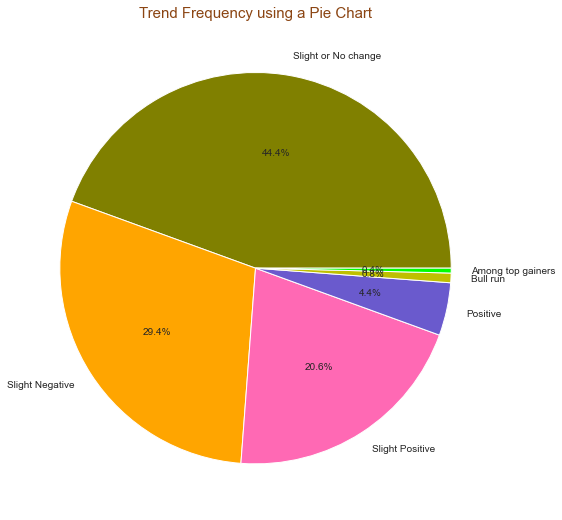

In [29]:
labels=AMZN.Trend.value_counts().index
colors=["olive","orange","hotpink","slateblue","y","lime"]
sizes=AMZN.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15)

### Inference:

The Amazon stock was in the bull run for just about 0.4% of the time,for about 3.2% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 60.6%) the stock showed a very slight or no change in the price.

#### **What was the correlation between daily returns of different stocks?**

Merging the columns of all companies Adjacent close 

In [30]:
all_adj = pd.concat([AAPL['Adj Close'] ,GOOG['Adj Close'],AMZN['Adj Close'],MSFT['Adj Close']], axis = 1)

In [31]:
all_adj.columns = ['Apple','Google','Amazon','Microsoft']

In [32]:
all_adj

,Apple,Google,Amazon,Microsoft
Date,,,,
2021-10-18,145.733368,142.960495,172.337006,304.737823
2021-10-19,147.931061,143.822006,172.207504,305.670013
2021-10-20,148.428268,142.414993,170.753006,304.856812
2021-10-21,148.647034,142.780502,171.750504,308.178986
2021-10-22,147.861450,138.625000,166.777496,306.592285
...,...,...,...,...
2022-10-12,138.339996,98.300003,112.900002,225.750000
2022-10-13,142.990005,99.709999,112.529999,234.240005
2022-10-14,138.380005,97.180000,106.900002,228.559998


In [33]:
pct_df = all_adj.pct_change()
pct_df.tail()

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-10-12,-0.004605,0.002550,0.006149,0.001508
2022-10-13,0.033613,0.014344,-0.003277,0.037608
2022-10-14,-0.032240,-0.025374,-0.050031,-0.024249
2022-10-17,0.029123,0.037045,0.064453,0.039246
2022-10-18,0.009409,0.006053,0.022585,0.004084


<AxesSubplot:>

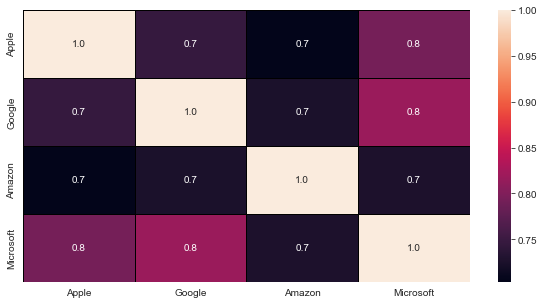

In [34]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 

### Inference:

Microsoft seems to have the highest correlation with Apple as well as Google. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### **Note:**
Here the Analysis is shown with respect to Stock. You can always use other companies stocks and Explore more on the Analysis